In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
pwd()

'D:\\House Price Prediction\\5-Days-Live-EDA-and-Feature-Engineering-main'

In [20]:
df = pd.read_csv("zomato.csv",encoding="ISO-8859-1")

In [21]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [22]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [23]:
df.describe(include='object')

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text
count,9551,9551,9551,9551,9551,9542,9551,9551,9551,9551,9551,9551,9551
unique,7446,141,8918,1208,1265,1825,12,2,2,2,1,6,6
top,Cafe Coffee Day,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",North Indian,Indian Rupees(Rs.),No,No,No,No,Orange,Average
freq,83,5473,11,122,122,936,8652,8393,7100,9517,9551,3737,3737


In [24]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [25]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [26]:
df.shape

(9551, 21)

In [27]:
[x for x in df if df[x].isna().sum()>1]

['Cuisines']

<AxesSubplot:>

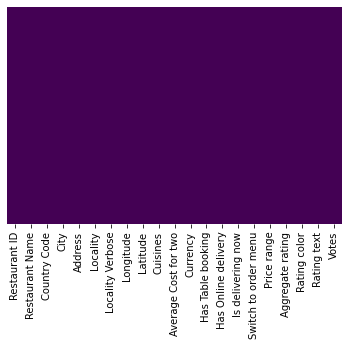

In [35]:
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [36]:
df_country = pd.read_excel("Country-Code.xlsx")

In [37]:
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [48]:
left_join = pd.merge(left = df,right = df_country,on='Country Code',how = 'left')

In [51]:
left_join.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [52]:
left_join.sample()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
1623,18372397,The Oven Artist,1,Gurgaon,"191, New Colony, Near Old Railway Road, Gurgaon",Old Railway Road,"Old Railway Road, Gurgaon",77.015717,28.465205,Bakery,...,No,No,No,No,2,3.5,Yellow,Good,25,India


In [54]:
left_join.groupby("Country")['Restaurant Name'].describe()

,count,unique,top,freq
Country,,,,
Australia,24,24,Whitebull Hotel,1
Brazil,60,58,Garota de Ipanema,2
Canada,4,4,Tokyo Sushi,1
India,8652,6604,Cafe Coffee Day,83
Indonesia,21,18,Talaga Sampireun,3
New Zealand,40,40,Kiss Kiss,1
Phillipines,22,21,Silantro Fil-Mex,2
Qatar,20,20,7st by Mumbai Spices,1
Singapore,20,20,Sky On 57,1


In [55]:
left_join['Country'].value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [56]:
country_names = left_join.Country.value_counts().index

In [59]:
country_val = left_join.Country.value_counts().values

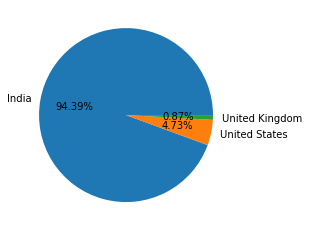

In [80]:
#  Pie Chart
plt.pie(country_val[:3],labels = country_names[:3],autopct='%1.2f%%');

<AxesSubplot:>

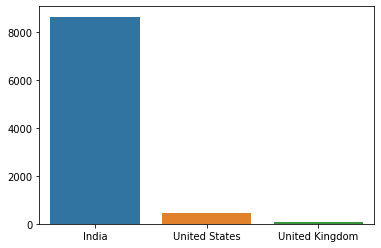

In [70]:
# barplot
sns.barplot(x=country_names[:3],y=country_val[:3])

In [83]:
left_join.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [106]:
ratings = left_join.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

In [107]:
ratings.sample(5)

,Aggregate rating,Rating color,Rating text,Rating Count
15,3.2,Orange,Average,522
29,4.6,Dark Green,Excellent,78
14,3.1,Orange,Average,519
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1


In [105]:
pd.DataFrame(left_join.groupby(['Aggregate rating','Rating color','Rating text']).size()).rename(columns={0:'Rating_Count'})

,,,Rating_Count
Aggregate rating,Rating color,Rating text,
0.0,White,Not rated,2148
1.8,Red,Poor,1
1.9,Red,Poor,2
2.0,Red,Poor,7
2.1,Red,Poor,15
2.2,Red,Poor,27
2.3,Red,Poor,47
2.4,Red,Poor,87
2.5,Orange,Average,110


In [113]:
ratings.head(3)

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2


In [124]:
ndf = ratings.groupby(['Rating color','Rating text'])['Rating Count'].sum()

In [141]:
ndf

,,Rating Count
Rating color,Rating text,
Dark Green,Excellent,301
Green,Very Good,1079
Orange,Average,3737
Red,Poor,186
White,Not rated,2148
Yellow,Good,2100


<AxesSubplot:xlabel='Rating color,Rating text'>

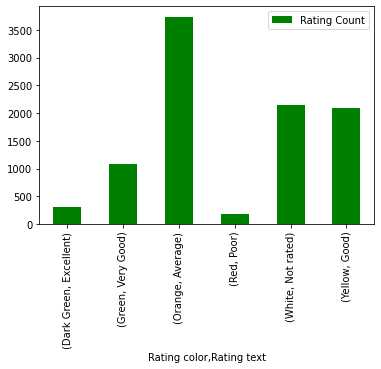

In [142]:
ndf.plot.bar(color='g',)

In [133]:
ratings.columns

Index(['Aggregate rating', 'Rating color', 'Rating text', 'Rating Count'], dtype='object')

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

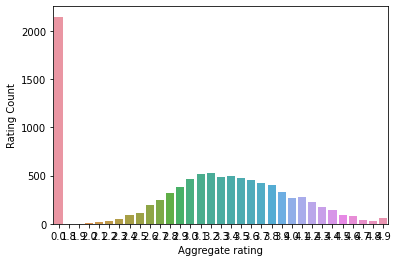

In [135]:
sns.barplot(x='Aggregate rating',y='Rating Count',data=ratings)

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

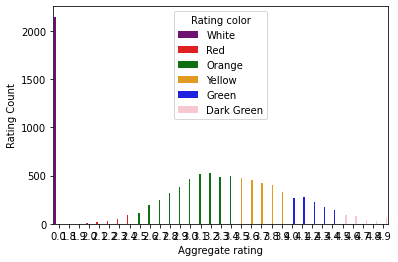

In [146]:
sns.barplot(x='Aggregate rating',y='Rating Count',data=ratings,hue='Rating color',palette=
            ['Purple','Red','Green','Orange','Blue','Pink'])

<AxesSubplot:xlabel='Rating color', ylabel='count'>

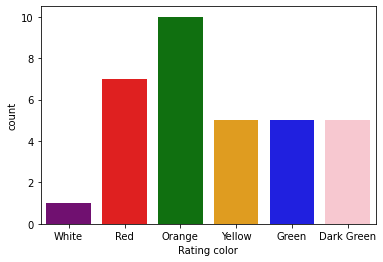

In [147]:
sns.countplot(x='Rating color',data=ratings,palette=['Purple','Red','Green','Orange','Blue','Pink'])

In [151]:
left_join.sample()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
9200,3800052,Golden Dragon,1,Surat,"10-15, Second Floor, Rangila Park, Ghod Dod Ro...",Athwa,"Athwa, Surat",72.804342,21.175104,Chinese,...,No,No,No,No,3,4.2,Green,Very Good,197,India


In [174]:
left_join.groupby(['Country'])['Rating color'].value_counts()

Country        Rating color
Australia      Yellow           13
               Green             5
               Orange            4
               Dark Green        1
               Red               1
                              ... 
United States  Yellow          159
               Dark Green       68
               Orange           23
               White             3
               Red               2
Name: Rating color, Length: 66, dtype: int64

In [167]:
left_join.sample()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
3081,18337893,The Luggage Room Kitchen And Bar,1,New Delhi,"M-39, Outer Circle, Connaught Place, New Delhi",Connaught Place,"Connaught Place, New Delhi",77.222867,28.633163,"North Indian, Continental, Fast Food",...,Yes,No,No,No,3,3.5,Yellow,Good,63,India


In [183]:
left_join.Country.loc[(left_join['Rating color']=='White')]

30              Brazil
58              Brazil
69              Brazil
77              Brazil
78              Brazil
             ...      
9109             India
9110             India
9111             India
9112             India
9351    United Kingdom
Name: Country, Length: 2148, dtype: object

In [191]:
left_join.Country.loc[(left_join['Aggregate rating']==0.0)].value_counts()

India             2139
Brazil               5
United States        3
United Kingdom       1
Name: Country, dtype: int64

In [189]:
left_join[left_join['Rating color']=='White'].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [193]:
left_join.sample()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
8585,18472655,The Black Box,1,Noida,"Shop 1, Godavari Complex Market, Sector 37, Noida",Sector 37,"Sector 37, Noida",77.340435,28.565446,"North Indian, Continental",...,No,Yes,No,No,1,3.1,Orange,Average,6,India


In [194]:
left_join.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [198]:
left_join.groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [203]:
left_join.groupby(['Country','Has Online delivery']).size().reset_index()

,Country,Has Online delivery,0
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20
